In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cancer_genes = ['BRAF','ALDOC','IDH1','TP53','KMT2D','KRAS','PIK3CA','PTEN','SPTA1']

In [3]:
delta_corr_df = pd.read_csv('data/delta_correlation_df_with_significance.csv')
correlation_df = pd.read_csv('data/tumor_normal_correlation_df.csv')

In [4]:
df = pd.merge(delta_corr_df, correlation_df)
df = df[df.Gene.isin(cancer_genes)]
df['Significant Delta Correlation'] = df.FDR < 0.05

In [5]:
sns.set_context(rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16, 'xtick.labelsize': 12, 'ytick.labelsize': 12}) 

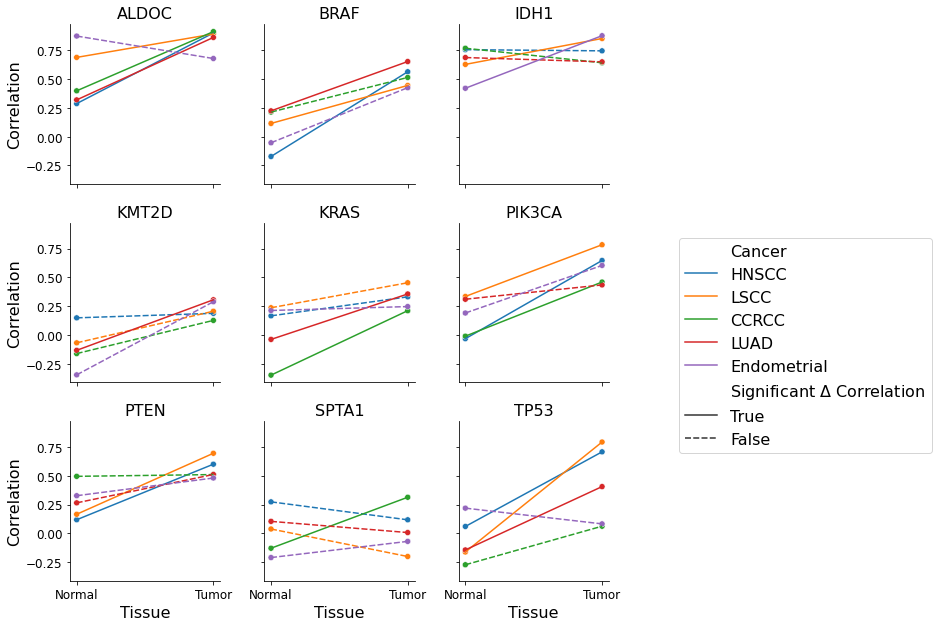

In [6]:
g = sns.FacetGrid(df, col ='Gene', height = 3, col_wrap = 3, sharex = True, sharey = True)
g.map_dataframe(sns.scatterplot, x = 'Tissue', y = 'Spearman_Rho', hue = 'Cancer', palette='tab10')
g.map_dataframe(sns.lineplot, x = 'Tissue', y = 'Spearman_Rho', hue = 'Cancer', palette='tab10', style = 'Significant Delta Correlation', style_order = [True, False], label = '_Hidden')
g.set_axis_labels('Tissue', 'Correlation')
g.set_titles('{col_name}')
current_handles, current_labels = plt.gca().get_legend_handles_labels()
del current_labels[:5]
del current_handles[:5]
current_labels[6] = 'Significant ' r'$\Delta$' +  ' Correlation'
g.tight_layout()
plt.legend(current_handles, current_labels, bbox_to_anchor=(3.2, 2.2))
plt.savefig('Figures/Figure 3) Interesting Cancer Genes Correlation Change_test.png',dpi = 600, bbox_inches='tight')

In [7]:
df[df["Gene"]=="BRAF"]

,Gene,Delta_Correlation,P_Value,FDR,Cancer,Significant,Tissue,Spearman_Rho,Significant Delta Correlation
1812,BRAF,0.734809,0.000004,0.000056,HNSCC,True,Normal,-0.171939,True
1813,BRAF,0.734809,0.000004,0.000056,HNSCC,True,Tumor,0.562870,True
21600,BRAF,0.329456,0.006475,0.011317,LSCC,True,Normal,0.114676,True
21601,BRAF,0.329456,0.006475,0.011317,LSCC,True,Tumor,0.444131,True
44174,BRAF,0.300355,0.024805,0.072022,CCRCC,False,Normal,0.213193,False
44175,BRAF,0.300355,0.024805,0.072022,CCRCC,False,Tumor,0.513547,False
63816,BRAF,0.427805,0.000069,0.000273,LUAD,True,Normal,0.223634,True
63817,BRAF,0.427805,0.000069,0.000273,LUAD,True,Tumor,0.651439,True
85560,BRAF,0.477884,0.070436,0.213169,Endometrial,False,Normal,-0.053019,False
85561,BRAF,0.477884,0.070436,0.213169,Endometrial,False,Tumor,0.424865,False


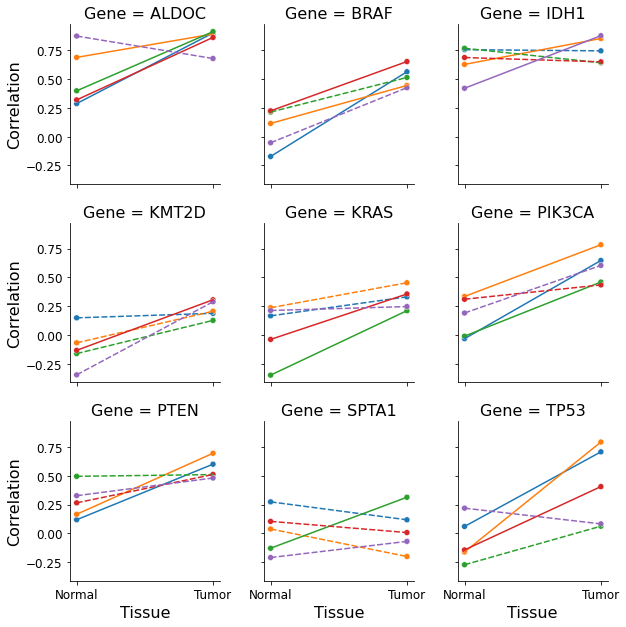

In [67]:
g = sns.FacetGrid(df, col ='Gene', height = 3, col_wrap = 3, sharex = True, sharey = True)
g.map_dataframe(sns.scatterplot, x = 'Tissue', y = 'Spearman_Rho', hue = 'Cancer', palette='tab10')
g.map_dataframe(sns.lineplot, x = 'Tissue', y = 'Spearman_Rho', hue = 'Cancer', palette='tab10', style = 'Significant Delta Correlation', style_order = [True, False], label = '_Hidden')
g.set_axis_labels('Tissue', 'Correlation')

current_handles, current_labels = plt.gca().get_legend_handles_labels()


In [32]:
correlation_df

,Gene,Tissue,Spearman_Rho,Cancer
0,A1BG,Normal,0.340967,CCRCC
1,A1BG,Tumor,0.072434,CCRCC
2,A1CF,Normal,0.719744,CCRCC
3,A1CF,Tumor,0.911782,CCRCC
4,A2M,Normal,0.194680,CCRCC
...,...,...,...,...
103323,ZYX,Tumor,0.567283,LSCC
103324,ZZEF1,Normal,0.393190,LSCC
103325,ZZEF1,Tumor,0.651395,LSCC
103326,ZZZ3,Normal,0.170532,LSCC


In [69]:
del current_labels[:5]

In [70]:
current_labels

['Cancer',
 'HNSCC',
 'LSCC',
 'CCRCC',
 'LUAD',
 'Endometrial',
 'Significant Delta Correlation',
 'True',
 'False']

In [30]:
temp

,Gene,Tissue,Spearman_Rho,Cancer
39363,A1BG,Tumor,-0.104064,LUAD
39365,A1CF,Tumor,0.218941,LUAD
39367,A2M,Tumor,0.356725,LUAD
39369,A2ML1,Tumor,0.035608,LUAD
39371,AAAS,Tumor,0.270906,LUAD
...,...,...,...,...
61608,ZWINT,Tumor,0.685728,LUAD
61610,ZXDC,Tumor,0.177680,LUAD
61612,ZYG11B,Tumor,0.543511,LUAD
61614,ZYX,Tumor,0.427811,LUAD


In [31]:
temp = correlation_df[correlation_df['Tissue']=='Tumor']
temp = temp[temp['Cancer'] == 'LUAD']
for i in temp['Gene'].unique():
    temp2 = temp[temp['Gene']==i].Spearman_Rho
    if (temp2.iloc[0]) < 0:
        print(i)

A1BG
ABCC11
ABHD15
AC093323.1
ACTR10
ADAM12
ADCK2
AK9
AKIP1
ALB
AMBP
ANAPC16
ANGPTL6
ANKRD1
ANKRD35
ANKRD62
ANO5
AP2S1
AP4B1
AP5M1
APOA4
APOC3
APOC4
APOH
APOM
ARID3B
ARPC1A
ARPIN
ASB1
ASPM
ASXL1
ATF7IP2
ATMIN
ATP1A3
ATP2A1
ATP6V1E1
ATP6V1G1
ATRIP
AVIL
AZU1
BAP1
BCL11A
BRCC3
BTN1A1
BTNL9
C16orf71
C19orf53
C1orf162
C22orf39
C3AR1
C3orf52
C4BPB
C6
C8G
C9
CACNG6
CAMP
CAPN3
CARD17
CASC1
CCDC18
CCDC34
CCNH
CCSAP
CCT6B
CD5L
CDK20
CDNF
CEACAM8
CENPJ
CEP164
CFAP46
CFAP74
CFHR4
CHST9
CHURC1
CLK1
CLTCL1
CMTM6
CNDP1
CNNM2
CNTN3
CNTROB
COG5
COL13A1
COL22A1
COMMD6
COPS5
COQ4
CRNN
CXorf21
CYB5D2
DAD1
DAW1
DBH
DCAF15
DCD
DCUN1D2
DGCR6L
DMP1
DMWD
DNAH11
DNAH6
DPP6
DSC3
DUSP28
DZIP3
EGFL8
ELANE
ELMOD3
EMC2
EXD3
F12
FADS6
FAM183A
FANCL
FARSA
FAT2
FAT3
FBRSL1
FBXL14
FCF1
FGD1
FIGN
FRMPD3
FZD10
GARNL3
GATB
GLIS2
GPANK1
GSTA3
HEATR4
HECTD3
HELQ
HGFAC
HOXC10
HRG
HRNR
HSPA6
HYPK
IGFALS
IGHV3OR16-8
IGKV1D-43
IGKV2D-30
IGLV5-52
IMP3
INHBC
INHBE
INO80D
INTU
IQCG
ITIH1
ITLN2
JARID2
KBTBD3
KCNN3
KCNT1
KIF9
KLKB1
K

In [33]:
correlation_df[correlation_df['Gene'] == 'TP53']


,Gene,Tissue,Spearman_Rho,Cancer
17768,TP53,Normal,-0.271304,CCRCC
17769,TP53,Tumor,0.063054,CCRCC
37296,TP53,Normal,0.219685,Endometrial
37297,TP53,Tumor,0.083272,Endometrial
59370,TP53,Normal,-0.142796,LUAD
59371,TP53,Tumor,0.406583,LUAD
79817,TP53,Normal,0.060747,HNSCC
79818,TP53,Tumor,0.707897,HNSCC
102436,TP53,Normal,-0.160649,LSCC
102437,TP53,Tumor,0.793116,LSCC
